### Imports

In [102]:
import os
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint

In [103]:
import matplotlib
%matplotlib notebook 
plt.set_loglevel("info")

In [104]:
from pymoo.visualization.scatter import Scatter

In [71]:
from pymooCFD.core.minimizeCFD import MinimizeCFD
# from pymooCFD.problems.rans_k_eps import RANS_k_eps as BaseCase
# from pymooCFD.problems.oscill_cyl import OscillCylinder as BaseCase
# from pymooCFD.problems.rans_jet import RANSJet as BaseCase
# from pymooCFD.problems.air_purifier import Room2D_AP as BaseCase

In [72]:
study = MinimizeCFD(BaseCase)

04-28 10:39:13 :: INFO     :: optStudy-Room2D_AP :: ~~~~~~~~~~~~~~~~~~~~~~~~~~
04-28 10:39:13 :: INFO     :: optStudy-Room2D_AP :: INITIALIZING - Pickle Path
04-28 10:39:13 :: INFO     :: optStudy-Room2D_AP :: 	CHECKPOINT LOADED: optStudy-Room2D_AP/MinimizeCFD.checkpoint.npy
04-28 10:39:13 :: DEBUG    :: optStudy-Room2D_AP :: 	RESTART DICTONARY
04-28 10:39:13 :: DEBUG    :: optStudy-Room2D_AP :: 		opt_runs: []
04-28 10:39:13 :: DEBUG    :: optStudy-Room2D_AP :: 		case_runs: []
04-28 10:39:13 :: DEBUG    :: optStudy-Room2D_AP :: 		CFDCase: <class 'pymooCFD.problems.air_purifier.Room2D_AP'>
04-28 10:39:13 :: DEBUG    :: optStudy-Room2D_AP :: 		CFDGeneticAlgorithm: <class 'pymooCFD.core.pymooBase.CFDGeneticAlgorithm'>
04-28 10:39:13 :: DEBUG    :: optStudy-Room2D_AP :: 		CFDGeneticProblem: <class 'pymooCFD.core.pymooBase.CFDGeneticProblem'>
04-28 10:39:13 :: DEBUG    :: optStudy-Room2D_AP :: 		abs_path: /media/ydubief/M2CE-14TB-1/gitrepo/pymooCFD/optStudy-Room2D_AP
04-28 10:39:13 :: DEBUG

04-28 10:39:13 :: DEBUG    :: optStudy-Room2D_AP.run00 :: 		test_case: Directory: optStudy-Room2D_AP/run00/test_case | Parameters: [2.0, 2.0, 2, 3.25]
04-28 10:39:13 :: DEBUG    :: optStudy-Room2D_AP.run00 :: 		gen1_pop: [<pymoo.core.individual.Individual object at 0x7fea2b2cd8b0>
04-28 10:39:13 :: DEBUG    :: optStudy-Room2D_AP.run00 ::  <pymoo.core.individual.Individual object at 0x7fea2b2cda60>
04-28 10:39:13 :: DEBUG    :: optStudy-Room2D_AP.run00 ::  <pymoo.core.individual.Individual object at 0x7fea300649a0>
04-28 10:39:13 :: DEBUG    :: optStudy-Room2D_AP.run00 ::  <pymoo.core.individual.Individual object at 0x7fea2b2cdb80>
04-28 10:39:13 :: DEBUG    :: optStudy-Room2D_AP.run00 ::  <pymoo.core.individual.Individual object at 0x7fea2b2cd9d0>]
04-28 10:39:13 :: WARNING  :: optStudy-Room2D_AP.run00 :: {   'iterable_item_added': {   "root.algorithm.callback.data['best'][0]": 0.01397927303590551,
04-28 10:39:13 :: WARNING  :: optStudy-Room2D_AP.run00 ::                               

04-28 10:39:13 :: DEBUG    :: optStudy-Room2D_AP.run00 :: 	UPDATED DICTONARY
04-28 10:39:13 :: DEBUG    :: optStudy-Room2D_AP.run00 :: 		n_opt: 20
04-28 10:39:13 :: DEBUG    :: optStudy-Room2D_AP.run00 :: 		abs_path: /media/ydubief/M2CE-14TB-1/gitrepo/pymooCFD/optStudy-Room2D_AP/run00
04-28 10:39:13 :: DEBUG    :: optStudy-Room2D_AP.run00 :: 		log_level: 10
04-28 10:39:13 :: DEBUG    :: optStudy-Room2D_AP.run00 :: 		logger: <Logger optStudy-Room2D_AP.run00 (DEBUG)>
04-28 10:39:13 :: DEBUG    :: optStudy-Room2D_AP.run00 :: 		cp_init: False
04-28 10:39:13 :: DEBUG    :: optStudy-Room2D_AP.run00 :: 		run_path: /media/ydubief/M2CE-14TB-1/gitrepo/pymooCFD/optStudy-Room2D_AP/run00
04-28 10:39:13 :: DEBUG    :: optStudy-Room2D_AP.run00 :: 		algorithm: <pymooCFD.core.pymooBase.CFDGeneticAlgorithm object at 0x7fea3148ef40>
04-28 10:39:13 :: DEBUG    :: optStudy-Room2D_AP.run00 :: 		problem: # name: CFDGeneticProblem
04-28 10:39:13 :: DEBUG    :: optStudy-Room2D_AP.run00 :: # n_var: 4
04-28 10:3

In [73]:
from IPython.display import Image, display
import glob

def showImages(listOfImageNames, **kwargs):
    if isinstance(listOfImageNames, str):
        listOfImageNames = [listOfImageNames]
    listOfImageNames = [os.path.join(opt_run.abs_path, imageName) 
                            for imageName in listOfImageNames if opt_run.abs_path not in imageName]
    listOfImageNames = [glob.glob(imageName) for imageName in listOfImageNames]
    listOfImageNames = [item for sublist in listOfImageNames for item in sublist]
    print('Showing Images')
    print(listOfImageNames)
    for imageName in listOfImageNames:
        print('DISPLAYING:', imageName)
        display(Image(filename=imageName), **kwargs)
        

In [74]:
opt_run = study.opt_runs[0]

In [101]:
l = ['123456', '123']
if all(len(i)<=5 for i in l):
    print('True')

<IPython.core.display.Javascript object>


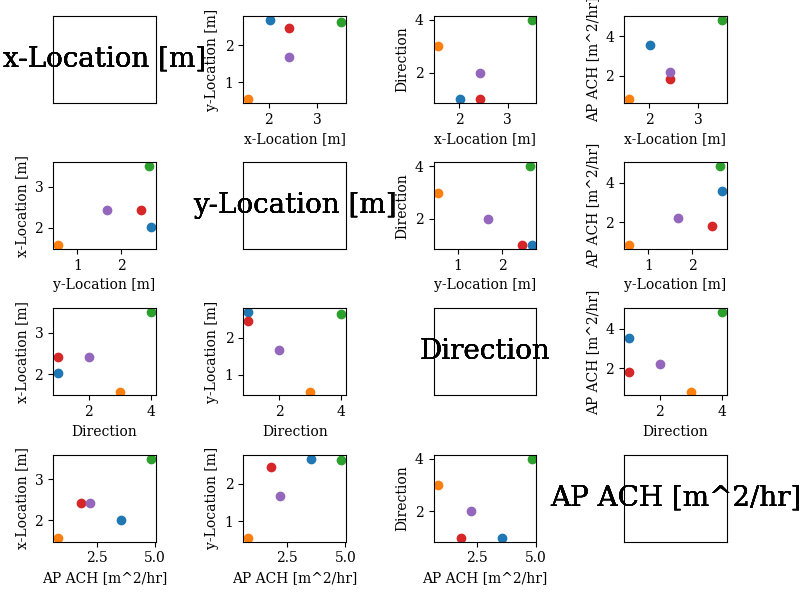

In [92]:
pop = opt_run.algorithm.pop
#### Parameter Space Plot ####
popX = pop.get('X')
var_plot = Scatter(title=None, #f'Generation {gen} Design Space',
                   legend=False, #var_leg,
                   labels=opt_run.problem.BaseCase.var_labels,
#                    s=10,
                   tight_layout=True
                   #                figsize=(10,8)
                   )
for ind_i, ind in enumerate(popX):
    var_plot.add(ind, label=f'IND {ind_i+1}')
# plot.do()
# print(plot.fig.__dict__)
# plot.fig.suptitle('TEST')
# plot.do()
var_plot.show()

In [75]:
import inspect
print(inspect.getsource(opt_run.plotGen))

    def plotGen(self, gen=None, max_leg_len=10):
        if gen is None:
            gen = self.algorithm.n_gen
        pop = self.algorithm.history[gen - 1].pop
        # legend display
        var_leg, obj_leg = False, False
        if len(pop) <= max_leg_len:
            if self.problem.BaseCase.n_var <= 3:
                var_leg = True
            if self.problem.BaseCase.n_obj <= 3:
                obj_leg = True
        #### Parameter Space Plot ####
        popX = pop.get('X')
        var_plot = Scatter(title=None, #f'Generation {gen} Design Space',
                           legend=False, #var_leg,
                           labels=None, #self.problem.BaseCase.var_labels,
                           tight_layout=False, #True
                           #                figsize=(10,8)
                           )
        for ind_i, ind in enumerate(popX):
            var_plot.add(ind, label=f'IND {ind_i+1}')
        # save parameter space plot
        var_plot.save(os.path.join(s

<IPython.core.display.Javascript object>


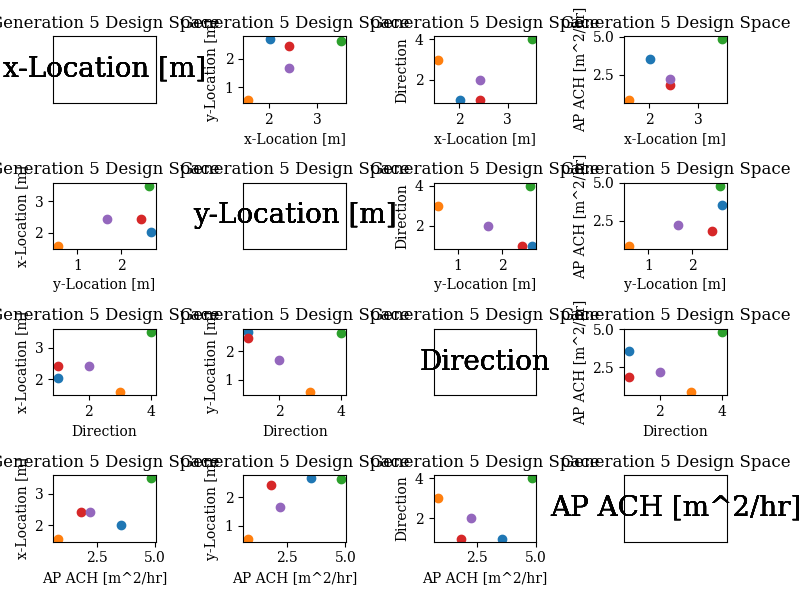

<IPython.core.display.Javascript object>


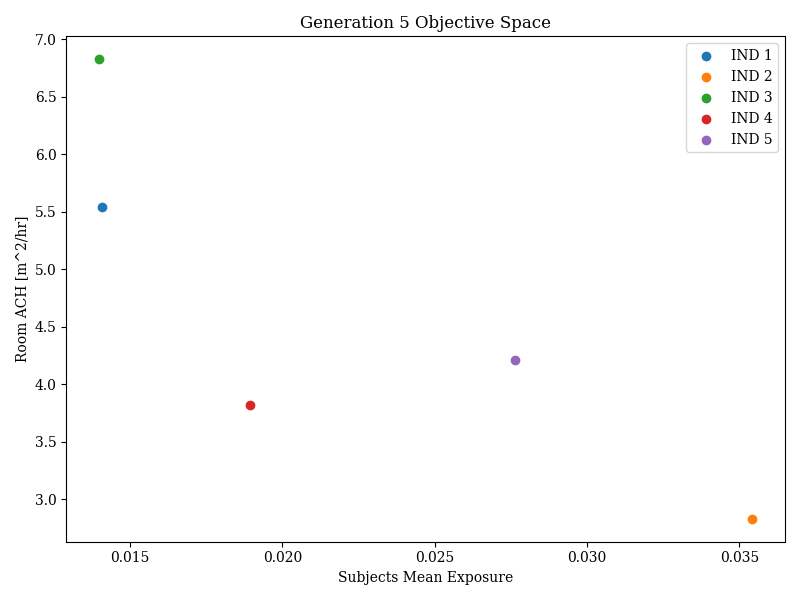

04-28 10:39:24 :: INFO     :: optStudy-Room2D_AP.run00 :: PLOTTED: Generation 5 Design and Objective Spaces


In [76]:
var_plot, obj_plot = opt_run.plotGen()

### Check Out Data Generated

In [9]:
print(opt_run.algorithm.history)
print(len(opt_run.algorithm.history))

[<pymooCFD.core.pymooBase.CFDGeneticAlgorithm object at 0x7fea348d2b20>, <pymooCFD.core.pymooBase.CFDGeneticAlgorithm object at 0x7fea348dd820>, <pymooCFD.core.pymooBase.CFDGeneticAlgorithm object at 0x7fea348e8940>, <pymooCFD.core.pymooBase.CFDGeneticAlgorithm object at 0x7fea348f3a60>, <pymooCFD.core.pymooBase.CFDGeneticAlgorithm object at 0x7fea3487db80>]
5


In [10]:
pprint(study.__dict__)

{'CFDCase': <class 'pymooCFD.problems.air_purifier.Room2D_AP'>,
 'CFDGeneticAlgorithm': <class 'pymooCFD.core.pymooBase.CFDGeneticAlgorithm'>,
 'CFDGeneticProblem': <class 'pymooCFD.core.pymooBase.CFDGeneticProblem'>,
 'abs_path': '/media/ydubief/M2CE-14TB-1/gitrepo/pymooCFD/optStudy-Room2D_AP',
 'case_runs': [],
 'cp_init': True,
 'log_level': 10,
 'logger': <Logger optStudy-Room2D_AP (DEBUG)>,
 'opt_runs': [<pymooCFD.core.optRun.OptRun object at 0x7fea34921640>]}


In [11]:
pprint(opt_run.__dict__)

{'abs_path': '/media/ydubief/M2CE-14TB-1/gitrepo/pymooCFD/optStudy-Room2D_AP/run00',
 'algorithm': <pymooCFD.core.pymooBase.CFDGeneticAlgorithm object at 0x7febe9508220>,
 'bnd_cases': [<pymooCFD.problems.air_purifier.Room2D_AP object at 0x7fea3488cb80>,
 'cp_init': False,
 'gen1_pop': Population([<pymoo.core.individual.Individual object at 0x7fea34885ca0>,
           dtype=object),
 'log_level': 10,
 'logger': <Logger optStudy-Room2D_AP.run00 (DEBUG)>,
 'n_opt': 20,
 'problem': <pymooCFD.core.pymooBase.CFDGeneticProblem object at 0x7fea348c62b0>,
 'run_path': '/media/ydubief/M2CE-14TB-1/gitrepo/pymooCFD/optStudy-Room2D_AP/run00',
 'test_case': <pymooCFD.problems.air_purifier.Room2D_AP object at 0x7fea34898a00>}


In [12]:
pprint(opt_run.algorithm.__dict__)

{'advance_after_initial_infill': True,
 'callback': <pymooCFD.core.pymooBase.PymooCFDCallback object at 0x7fea348c67f0>,
 'data': {},
 'default_termination': <pymoo.util.termination.default.MultiObjectiveDefaultTermination object at 0x7fea348c6a00>,
 'display': <pymooCFD.core.pymooBase.MyDisplay object at 0x7fea34921820>,
 'eliminate_duplicates': <pymoo.core.duplicate.DefaultDuplicateElimination object at 0x7fea34885fd0>,
 'evaluator': <pymoo.core.evaluator.Evaluator object at 0x7fea348c6940>,
 'has_terminated': True,
 'history': [<pymooCFD.core.pymooBase.CFDGeneticAlgorithm object at 0x7fea348d2b20>,
 'initialization': <pymoo.core.initialization.Initialization object at 0x7fea3488c0a0>,
 'is_initialized': True,
 'mating': <pymoo.core.mating.Mating object at 0x7fea3488c400>,
 'n_gen': 5,
 'n_offsprings': 2,
 'off': None,
 'opt': Population([<pymoo.core.individual.Individual object at 0x7fea34885ca0>,
           dtype=object),
 'pf': True,
 'pop': Population([<pymoo.core.individual.Indi

In [13]:
pprint(opt_run.problem.__dict__)

{'BaseCase': <class 'pymooCFD.problems.air_purifier.Room2D_AP'>,
 '_ideal_point': None,
 '_nadir_point': None,
 '_pareto_front': <pymoo.util.cache.Cache object at 0x7fea348c6a30>,
 '_pareto_set': <pymoo.util.cache.Cache object at 0x7fea348c62e0>,
 'callback': None,
 'check_inconsistencies': True,
 'data': {},
 'exclude_from_serialization': [],
 'gen1Pop': None,
 'n_constr': 0,
 'n_obj': 2,
 'n_var': 4,
 'replace_nan_values_by': inf,
 'validated': False,
 'xl': array([0.5, 0.5, 1. , 0.5]),
 'xu': array([3.5, 3.5, 4. , 6. ])}


In [14]:
# for key in optRun.__dict__:
#     pprint("{0:15} : {1}".format(key, optRun.__dict__[key])) #str(optRun.__dict__[key]).replace('\n', '\n\t\t  ')))

In [15]:
# for key in optRun.__dict__:
#     val = str(optRun.__dict__[key]).replace('\n', '\n\t\t')
#     pprint("{0:15} : {1}".format(key, val))

# Pre-Process Optimization Study

### Test Case

In [16]:
print(opt_run.test_case)
opt_run.test_case

Directory: optStudy-Room2D_AP/run00/test_case | Parameters: [2.0, 2.0, 2, 3.25]


In [17]:
pprint(opt_run.test_case.__dict__)

{'_f': None,
 '_g': None,
 '_x': [2.0, 2.0, 2, 3.25],
 'abs_path': '/media/ydubief/M2CE-14TB-1/gitrepo/pymooCFD/optStudy-Room2D_AP/run00/test_case',
 'cp_init': False,
 'datFile': 'temporal.h5',
 'inputFile': '2D_room.in',
 'jobFile': None,
 'log_level': 10,
 'logger': <Logger optStudy-Room2D_AP.run00.test_case (DEBUG)>,
 'meshFile': 'room_6P_ap.msh22',
 'meshSF': 1,
 'mesh_study': <pymooCFD.core.meshStudy.MeshStudy object at 0x7fea34898ac0>,
 'msCases': None,
 'numElem': None,
 'obj_labels': ['Subjects Mean Exposure', 'Room ACH [m^2/hr]'],
 'restart': False,
 'solnTime': None,
 'validated': False,
 'var_labels': ['x-Location [m]',
                'y-Location [m]',
                'Direction',
                'AP ACH [m^2/hr]']}


In [18]:
print(opt_run.test_case.msCases)

None


In [19]:
if opt_run.test_case.msCases is None:
    print('No Mesh Study Cases for Test Case')
else:
    for case in opt_run.test_case.msCases:
        pprint(case.__dict__)
        print()

No Mesh Study Cases for Test Case


In [20]:
if opt_run.test_case.msCases is None:
    print('No Mesh Study Cases for Test Case')
else:
    print('Mesh Size Factors:', opt_run.test_case.meshSFs)

No Mesh Study Cases for Test Case


In [21]:
if opt_run.test_case.msCases is None:
    print('No Mesh Study Cases for Test Case')
else:
    for case in opt_run.test_case.msCases:
        print(case)
        print('\t Objectives:', case._f)
#     print('\tParameters:', case._x, '\t Objectives:', case._f)

No Mesh Study Cases for Test Case


##### Update Test Case

In [22]:
# opt_run.appendMeshSFs(opt_run.test_case, [1.2])

In [23]:
# newMeshSFs = np.round(np.arange(0.3, 1.5, 0.1))
# opt_run.saveCP()
# opt_run.test_case.meshSFs

### Boundary Cases

In [24]:
print(opt_run.bnd_cases)

[<pymooCFD.problems.air_purifier.Room2D_AP object at 0x7fea3488cb80>, <pymooCFD.problems.air_purifier.Room2D_AP object at 0x7fea3488cd60>, <pymooCFD.problems.air_purifier.Room2D_AP object at 0x7fea3488cf40>, <pymooCFD.problems.air_purifier.Room2D_AP object at 0x7fea34892160>, <pymooCFD.problems.air_purifier.Room2D_AP object at 0x7fea34892340>, <pymooCFD.problems.air_purifier.Room2D_AP object at 0x7fea34892520>, <pymooCFD.problems.air_purifier.Room2D_AP object at 0x7fea34892700>, <pymooCFD.problems.air_purifier.Room2D_AP object at 0x7fea348928e0>, <pymooCFD.problems.air_purifier.Room2D_AP object at 0x7fea34892ac0>, <pymooCFD.problems.air_purifier.Room2D_AP object at 0x7fea34892ca0>, <pymooCFD.problems.air_purifier.Room2D_AP object at 0x7fea34892e80>, <pymooCFD.problems.air_purifier.Room2D_AP object at 0x7fea348980a0>, <pymooCFD.problems.air_purifier.Room2D_AP object at 0x7fea34898280>, <pymooCFD.problems.air_purifier.Room2D_AP object at 0x7fea34898490>, <pymooCFD.problems.air_purifier.R

In [25]:
if opt_run.bnd_cases is not None:
    for case in opt_run.bnd_cases:
        print(case)

Directory: optStudy-Room2D_AP/run00/boundary-cases/0.5_0.5_1_0.5 | Parameters: [0.5 0.5 1.  0.5]
Directory: optStudy-Room2D_AP/run00/boundary-cases/0.5_0.5_1_6 | Parameters: [0.5 0.5 1.  6. ]
Directory: optStudy-Room2D_AP/run00/boundary-cases/0.5_0.5_4_0.5 | Parameters: [0.5 0.5 4.  0.5]
Directory: optStudy-Room2D_AP/run00/boundary-cases/0.5_0.5_4_6 | Parameters: [0.5 0.5 4.  6. ]
Directory: optStudy-Room2D_AP/run00/boundary-cases/0.5_3.5_1_0.5 | Parameters: [0.5 3.5 1.  0.5]
Directory: optStudy-Room2D_AP/run00/boundary-cases/0.5_3.5_1_6 | Parameters: [0.5 3.5 1.  6. ]
Directory: optStudy-Room2D_AP/run00/boundary-cases/0.5_3.5_4_0.5 | Parameters: [0.5 3.5 4.  0.5]
Directory: optStudy-Room2D_AP/run00/boundary-cases/0.5_3.5_4_6 | Parameters: [0.5 3.5 4.  6. ]
Directory: optStudy-Room2D_AP/run00/boundary-cases/3.5_0.5_1_0.5 | Parameters: [3.5 0.5 1.  0.5]
Directory: optStudy-Room2D_AP/run00/boundary-cases/3.5_0.5_1_6 | Parameters: [3.5 0.5 1.  6. ]
Directory: optStudy-Room2D_AP/run00/boun

In [26]:
if opt_run.bnd_cases is not None:
    bnd_vars = np.array([case.x for case in opt_run.bnd_cases])
    print(bnd_vars)

[[0.5 0.5 1.  0.5]
 [0.5 0.5 1.  6. ]
 [0.5 0.5 4.  0.5]
 [0.5 0.5 4.  6. ]
 [0.5 3.5 1.  0.5]
 [0.5 3.5 1.  6. ]
 [0.5 3.5 4.  0.5]
 [0.5 3.5 4.  6. ]
 [3.5 0.5 1.  0.5]
 [3.5 0.5 1.  6. ]
 [3.5 0.5 4.  0.5]
 [3.5 0.5 4.  6. ]
 [3.5 3.5 1.  0.5]
 [3.5 3.5 1.  6. ]
 [3.5 3.5 4.  0.5]
 [3.5 3.5 4.  6. ]]


<IPython.core.display.Javascript object>


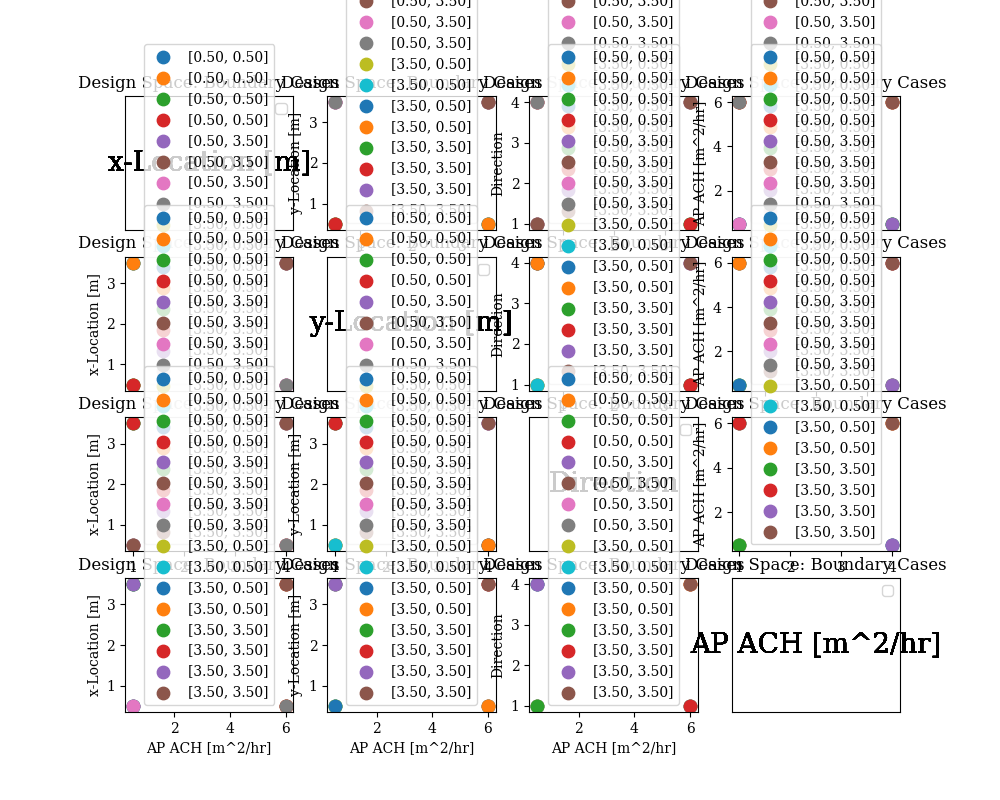

In [27]:
if opt_run.bnd_cases is not None:
    plot = Scatter(title='Design Space: Boundary Cases', 
                   legend=True,
                   labels=opt_run.problem.BaseCase.var_labels, 
                   figsize=(10,8)
                  )
    for var in bnd_vars:
        plot.add(var, label='[%.2f, %.2f]'%(var[0],var[1]), s=80)
#     path = os.path.join(opt_run.rel_path, 'boundary-cases', 'bndPts_plot-varSpace.png')
#     plot.save(path, dpi=100)
    plot.show()

In [34]:
if opt_run.bnd_cases is not None:
    bnd_objs = np.array([case.f for case in opt_run.bnd_cases])
    print(bnd_objs)

[[-8.97926555e-02  3.52862547e-03]
 [ 1.12828974e-01  1.12512320e-02]
 [ 3.84251524e+02  1.44309385e-01]
 [-1.06753860e+01  4.54399401e-01]]


<IPython.core.display.Javascript object>


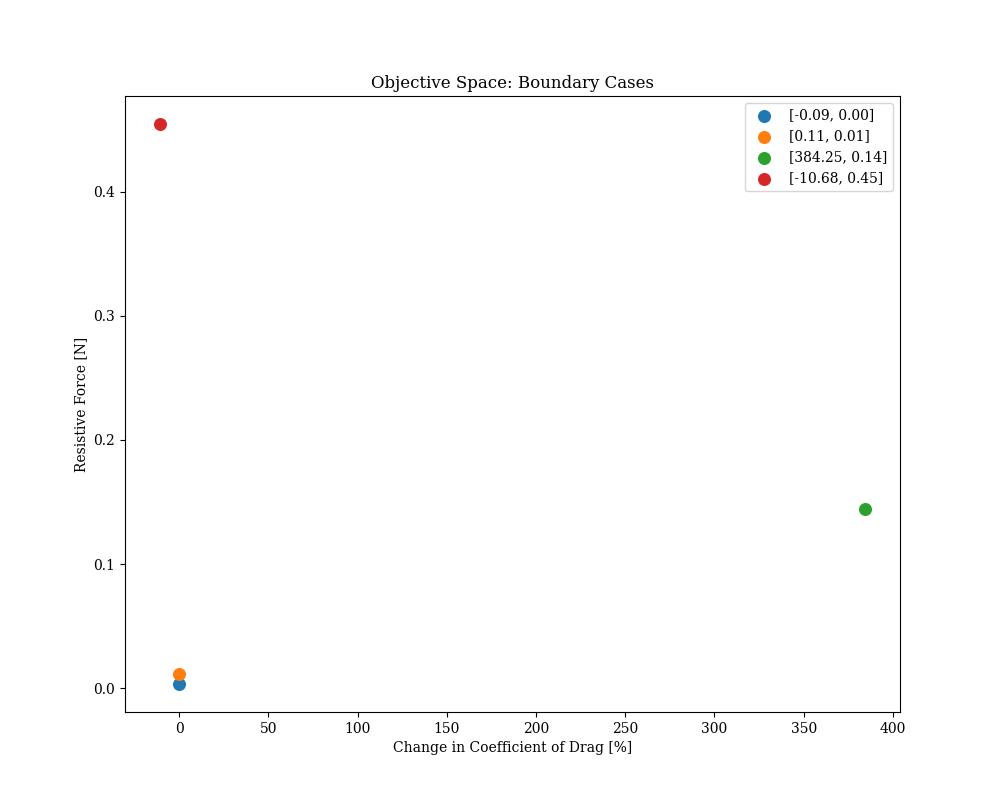

In [38]:
if None not in bnd_objs:
    plot = Scatter(title= 'Objective Space: Boundary Cases', 
                   legend = True, 
                   labels=opt_run.problem.BaseCase.obj_labels, 
                   figsize=(10,8)
                  )
    for obj in bnd_objs:
        plot.add(obj, label='[%.2f, %.2f]'%(obj[0],obj[1]), s=70, alpha=1)
    path = os.path.join(opt_run.abs_path, 'boundary-cases', 'bndPts_plot-objSpace.png')
    plot.save(path, dpi=100)
    plot.show()

In [39]:
if None not in bnd_objs:
    # Non-dominated Sorting of Boundary Cases
    n_survive = 1
    F = np.array([case.f for case in opt_run.bnd_cases])
    X = np.array([case.x for case in opt_run.bnd_cases])
    from pymoo.util.nds.non_dominated_sorting import NonDominatedSorting
    nds = NonDominatedSorting()
    # do the non-dominated sorting until splitting front
    fronts = nds.do(F, n_stop_if_ranked=n_survive)
    front = fronts[0]
    nonDom_CCobj = F[front, :][0]
    nonDom_CCvar = X[front, :][0]
    print('Non-dominated: Boundary Cases')
    print('Parameters-', nonDom_CCvar)
    print('Objectives-', nonDom_CCobj)

Non-dominated: Boundary Cases
Parameters- [0.2 0.1]
Objectives- [-0.08979266  0.00352863]


### Mesh Studies

In [40]:
pprint(opt_run.test_case.mesh_study.__dict__)

{'_size_factors': array([0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4]),
 'base_case': <pymooCFD.problems.oscill_cyl.OscillCylinder object at 0x7f4db7be4dc0>,
 'cases': None,
 'folder': '/media/ydubief/M2CE-14TB-1/gitrepo/pymooCFD/optStudy-OscillCylinder/run00/test_case/mesh_study',
 'logger': <Logger pymooCFD.core.meshStudy./media/ydubief/M2CE-14TB-1/gitrepo/pymooCFD/optStudy-OscillCylinder/run00/test_case/mesh_study (WARNING)>}


In [41]:
print(opt_run.test_case.mesh_study.cases)

None


### Generation 1

In [42]:
print(len(opt_run.algorithm.history))
print(opt_run.algorithm.history)

25
[<pymooCFD.core.pymooBase.CFDGeneticAlgorithm object at 0x7f4db7f1db20>, <pymooCFD.core.pymooBase.CFDGeneticAlgorithm object at 0x7f4db7edbdc0>, <pymooCFD.core.pymooBase.CFDGeneticAlgorithm object at 0x7f4db7efb700>, <pymooCFD.core.pymooBase.CFDGeneticAlgorithm object at 0x7f4db7e94fd0>, <pymooCFD.core.pymooBase.CFDGeneticAlgorithm object at 0x7f4db7eb4970>, <pymooCFD.core.pymooBase.CFDGeneticAlgorithm object at 0x7f4db7e54310>, <pymooCFD.core.pymooBase.CFDGeneticAlgorithm object at 0x7f4db7e6fc70>, <pymooCFD.core.pymooBase.CFDGeneticAlgorithm object at 0x7f4db7e11760>, <pymooCFD.core.pymooBase.CFDGeneticAlgorithm object at 0x7f4db7e30250>, <pymooCFD.core.pymooBase.CFDGeneticAlgorithm object at 0x7f4db7dcce50>, <pymooCFD.core.pymooBase.CFDGeneticAlgorithm object at 0x7f4db7deba30>, <pymooCFD.core.pymooBase.CFDGeneticAlgorithm object at 0x7f4db7d8c640>, <pymooCFD.core.pymooBase.CFDGeneticAlgorithm object at 0x7f4db7dab370>, <pymooCFD.core.pymooBase.CFDGeneticAlgorithm object at 0x7f4

In [43]:
print(len(opt_run.algorithm.history[0].pop))

50


##### Generation 1: Parameter Space

In [44]:
# opt_run.plotDir = os.path.join(opt_run.optDatDir, 'plots')
# os.mkdir(opt_run.plotDir)
# opt_run.problem.BaseCase.var_labels = ['Number of Tasks', 'Number of CPUs per Task']
# print(opt_run.problem.BaseCase.var_labels)

<IPython.core.display.Javascript object>


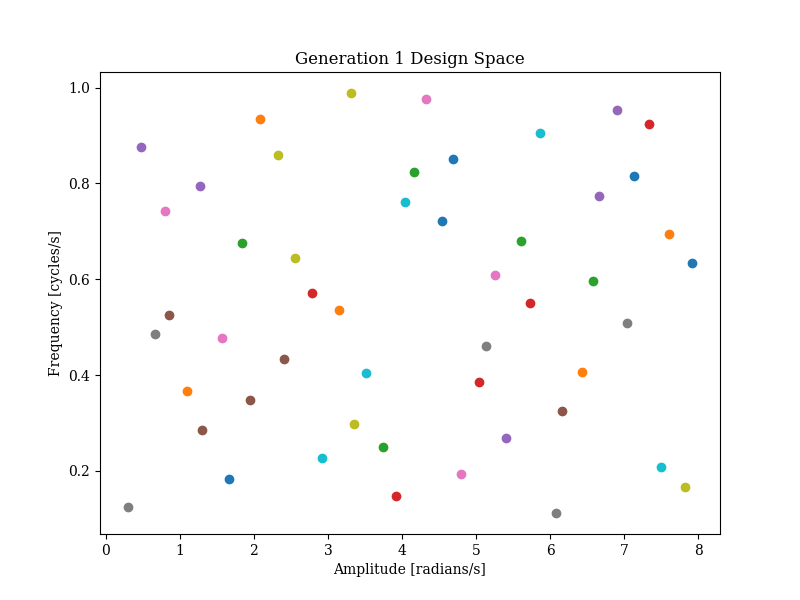

In [45]:
popX = opt_run.algorithm.history[0].pop.get('X')
gen = opt_run.algorithm.history[0].n_gen
if len(popX) <= 10:
    leg = True
else:
    leg = False
plot = Scatter(title=f'Generation {gen} Design Space', 
               legend=leg, 
               labels=opt_run.problem.BaseCase.var_labels,
#                figsize=(10,8)
              )
for ind_i, ind in enumerate(popX):
    plot.add(ind, label=f'IND {ind_i+1}')
# save parameter space plot
# plot.save(os.path.join(opt_run.plotDir, 'gen1_var_space.png'), dpi=100)
plot.show()

##### Generation 1: Objective Space

<IPython.core.display.Javascript object>


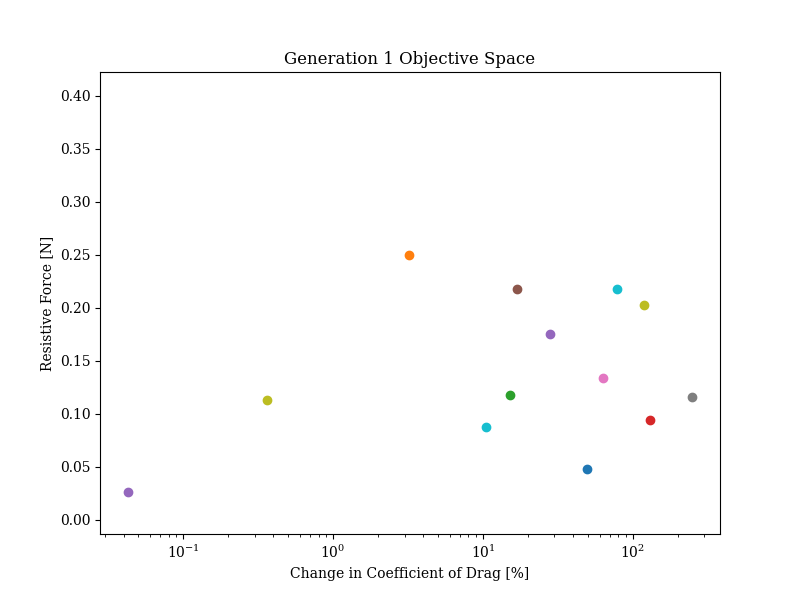

In [46]:
popF = opt_run.algorithm.history[0].pop.get('F')
gen = opt_run.algorithm.history[0].n_gen
if len(popF) <= 10:
    leg = True
else:
    leg = False
plot = Scatter(title=f'Generation {gen} Objective Space', 
               legend=leg, 
               labels=opt_run.problem.BaseCase.obj_labels
              )
for ind_i, ind in enumerate(popF):
    plot.add(ind, label=f'IND {ind_i+1}')
plot.do()
plot.ax.set_xscale('log')
# save parameter space plot
# plot.save(os.path.join(opt_run.plotDir, 'gen1_obj_space.png'), dpi=100)
# print(os.path.join(opt_run.plotDir, 'gen1_obj_space.png'))
plot.show()

### Generation 1: Mapping Parameters to Objectives
Remember that for each plot the parameters(s) not labeled are also varying. 

Therefore, if a strong relationship is seen in these plots then it is likely a relationship independent of the other variable.


<IPython.core.display.Javascript object>


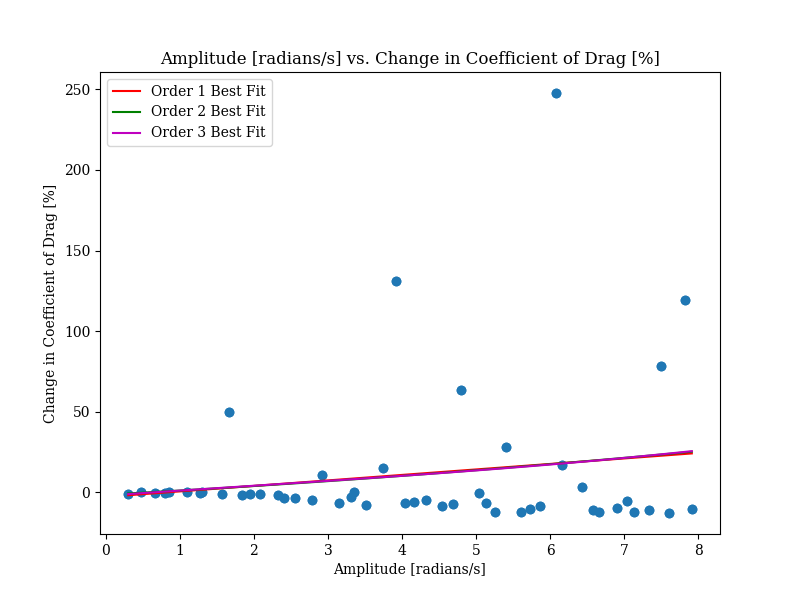

<IPython.core.display.Javascript object>


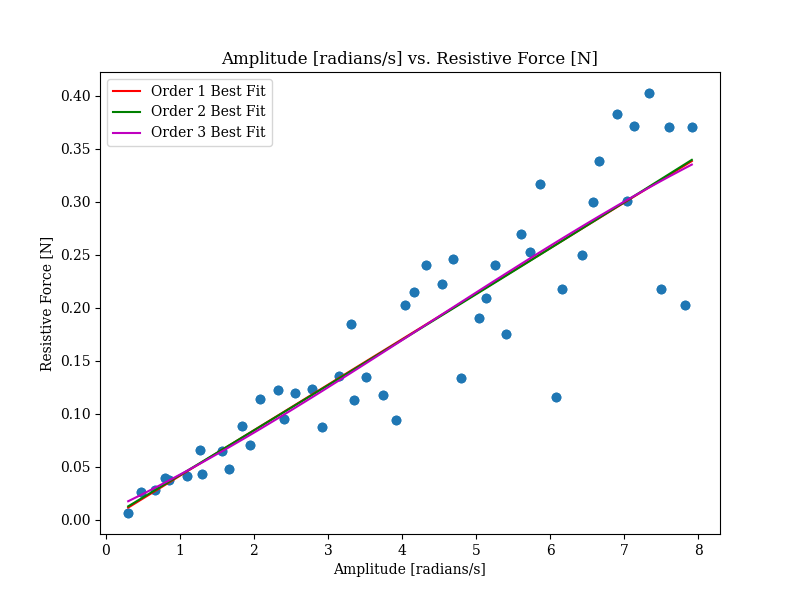

<IPython.core.display.Javascript object>


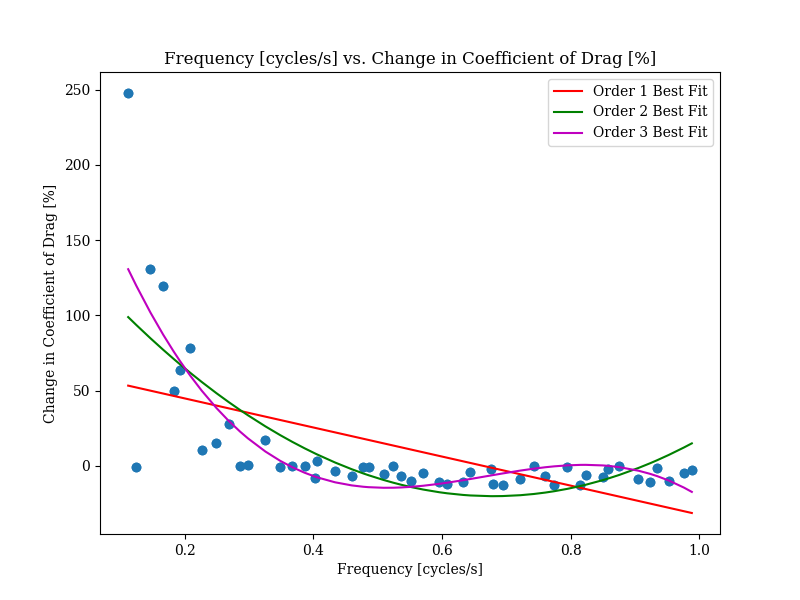

<IPython.core.display.Javascript object>


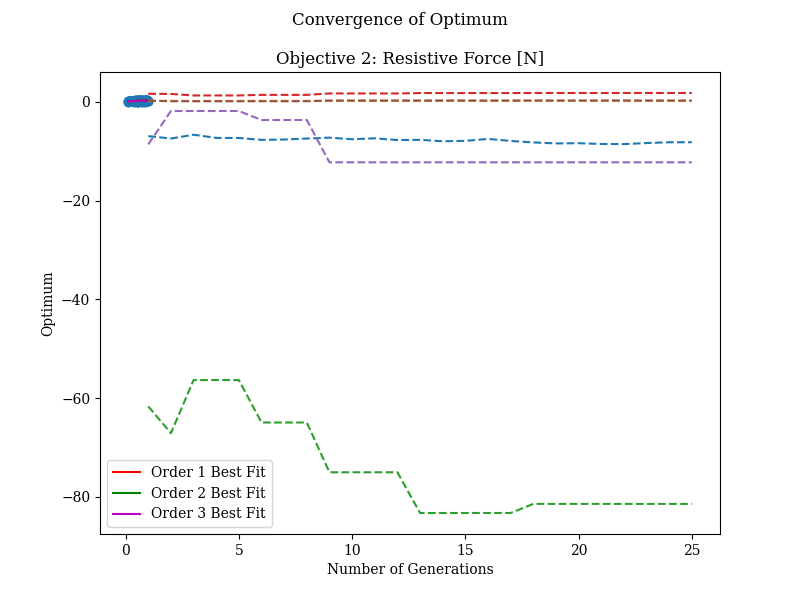

In [47]:
plots, map_paths = opt_run.map_gen1()

In [51]:
# %matplotlib inline

In [54]:
# plots[0].show()

In [55]:
# plots[1].show()
# print(mapPaths)

In [56]:
# plots[0].ax.set_xscale('log')
# plots[0].save(map_paths[0])
# plots[0].show()

In [57]:
# p = plots[0]
# p.show()

In [58]:
# from IPython.display import Image, display
# map_paths = [os.path.join(opt_run.mapDir, ent) for ent in os.listdir(opt_run.mapDir) if ent.endswith('.png')]
# for path in map_paths:
#     display(Image(filename=path))

# Post-Process Optimization Study

### Optimization Algorithm Convergence

In [59]:
#hist = opt_run.algorithm.history
#print(hist)
#print(opt_run.algorithm.callback)
#for alg in hist:
#    print(alg)
#    print(alg.callback)
# n_evals = np.array([e.evaluator.n_eval for e in hist])
# print('Number of Evaluations:', n_evals)

In [60]:
opt_avg = []
for h in opt_run.algorithm.history:
    F_opt = np.array([o.F for o in h.opt])
    F_avg = np.mean(F_opt, axis=0)
    #print(F_avg)
    opt_avg.append(F_avg)
opt_avg = np.array(opt_avg)
# print(opt_avg)

In [61]:
n_gen = [alg.n_gen for alg in opt_run.algorithm.history]
for obj_i in range(opt_run.problem.BaseCase.n_obj):
#     print(opt_sum)
    opt_obj = opt_avg[:,obj_i]
#     print(opt_obj)
    plt.suptitle('Convergence of Objective Mean')
    plt.title(f'Objective {obj_i+1}: {opt_run.problem.BaseCase.obj_labels[obj_i]}')
#     plt.plot(n_evals, opt_obj, "--")
    plt.plot(n_gen, opt_obj, "--")
    plt.xlabel('Number of Generations')
    plt.ylabel('Mean of Optimum Objectives')
#     plt.yscale("log")
    plt.savefig(os.path.join(opt_run.plotDir, f'convergence-obj{obj_i}')) #_{obj_labels[obj_i]}'))
    plt.show()

In [62]:
opt_minL = 1000
hist = opt_run.algorithm.history
for h in hist:
    l = len(h.opt)
    if l < opt_minL:
        opt_minL = l
print('Optimum minimum length:', opt_minL)
opt_sum = []
for h in hist:
    F_opt = np.array([o.F for o in h.opt[:opt_minL]])
    F_sum = np.sum(F_opt, axis=0)
#     print(F_sum)
    opt_sum.append(F_sum)
opt_sum = np.array(opt_sum)

Optimum minimum length: 9


In [63]:
n_gen = [alg.n_gen for alg in opt_run.algorithm.history]
for obj_i in range(opt_run.problem.BaseCase.n_obj):
#     print(opt_sum)
    opt_obj = opt_sum[:,obj_i]
#     print(opt_obj)
    plt.suptitle('Convergence of Objective Sum')
    plt.title(f'Objective {obj_i+1}: {opt_run.problem.BaseCase.obj_labels[obj_i]}')
#     plt.plot(n_evals, opt_obj, "--")
    plt.plot(n_gen, opt_obj, "--")
    plt.xlabel('Number of Generations')
    plt.ylabel('Sum of Optimum Objectives')
#     plt.yscale("log")
    plt.savefig(os.path.join(opt_run.plotDir, f'convergence-obj{obj_i}')) #_{obj_labels[obj_i]}'))
    plt.show()

In [64]:
hist = opt_run.algorithm.history
opt = np.array([alg.opt[0].F for alg in hist])
n_gen = [alg.n_gen for alg in hist]
for obj_i in range(len(opt[0])):
    opt_obj = opt[:,obj_i]
#     print(opt_obj)
    plt.suptitle('Convergence of Optimum')
    plt.title(f'Objective {obj_i+1}: {opt_run.problem.BaseCase.obj_labels[obj_i]}')
#     plt.plot(n_evals, opt_obj, "--")
    plt.plot(n_gen, opt_obj, "--")
    plt.xlabel('Number of Generations')
    plt.ylabel('Optimum')
#     plt.yscale("log")
    plt.savefig(os.path.join(opt_run.plotDir, f'convergence-obj{obj_i}')) #_{obj_labels[obj_i]}'))
    plt.show()

### Performance Indicator - Hypervolume
https://pymoo.org/misc/performance_indicator.html#Hypervolume

Maximize hypervolume from reference point. 

In [65]:
all_obj = [alg.pop.get('F') for alg in hist]

In [66]:
mean_all_obj = []
for obj_i in range(opt_run.problem.BaseCase.n_obj):
    mean_all_obj.append(np.mean([np.mean(obj_g[:,obj_i]) for obj_g in all_obj]))
print(mean_all_obj)

[-6.337683378538351, 0.1716450843621647]


In [67]:
mean_g1_obj = []
popF = hist[-1].pop.get('F')
for obj_i in range(opt_run.problem.BaseCase.n_obj):
    mean_g1_obj.append(np.mean(popF[:,obj_i]))
print(mean_g1_obj)

[-8.173010439456938, 0.1734062226372978]


In [68]:
ref_pt = [4, 4]
ref_pt = mean_g1_obj
ref_pt = mean_all_obj
sf = 100000
ref_pt = [mean_obj*sf for mean_obj in mean_g1_obj]

In [69]:
from pymoo.factory import get_performance_indicator
hv = get_performance_indicator("hv", ref_point=np.array(ref_pt))

In [70]:
for gen, alg in enumerate(opt_run.algorithm.history):
    print('Generation', gen+1, f"hypervolume {hv.do(alg.pop.get('X'))}")

Generation 1 hypervolume 0.0
Generation 2 hypervolume 0.0
Generation 3 hypervolume 0.0
Generation 4 hypervolume 0.0
Generation 5 hypervolume 0.0
Generation 6 hypervolume 0.0
Generation 7 hypervolume 0.0
Generation 8 hypervolume 0.0
Generation 9 hypervolume 0.0
Generation 10 hypervolume 0.0
Generation 11 hypervolume 0.0
Generation 12 hypervolume 0.0
Generation 13 hypervolume 0.0
Generation 14 hypervolume 0.0
Generation 15 hypervolume 0.0
Generation 16 hypervolume 0.0
Generation 17 hypervolume 0.0
Generation 18 hypervolume 0.0
Generation 19 hypervolume 0.0
Generation 20 hypervolume 0.0
Generation 21 hypervolume 0.0
Generation 22 hypervolume 0.0
Generation 23 hypervolume 0.0
Generation 24 hypervolume 0.0
Generation 25 hypervolume 0.0


### Latest Generation 

In [71]:
max_disp_len = 10

In [72]:
if len(opt_run.algorithm.pop.get('X')) < max_disp_len:
    print('FINAL POPULATION')
    print('Parameters')
    print(opt_run.algorithm.pop.get('X'))
    print('Objectives')
    print(opt_run.algorithm.pop.get('F'))

In [77]:
latest_pop = opt_run.algorithm.history[-1].pop
latest_popX = latest_pop.get('X')
latest_popF = latest_pop.get('F')

<IPython.core.display.Javascript object>


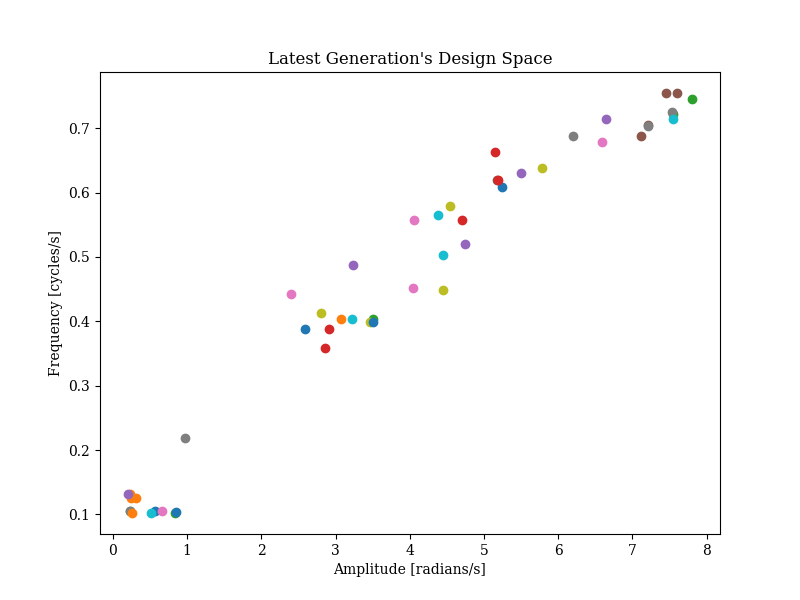

In [78]:
plot = Scatter(title='Latest Generation\'s Design Space', legend=False, labels=opt_run.problem.BaseCase.var_labels)
for ind_i, ind in enumerate(latest_popX):
    plot.add(ind, label=f'IND {ind_i+1}')
# save parameter space plot
plot.save(os.path.join(opt_run.plotDir, 'latest_var_space.png'), dpi=100)
plot.show()

<IPython.core.display.Javascript object>


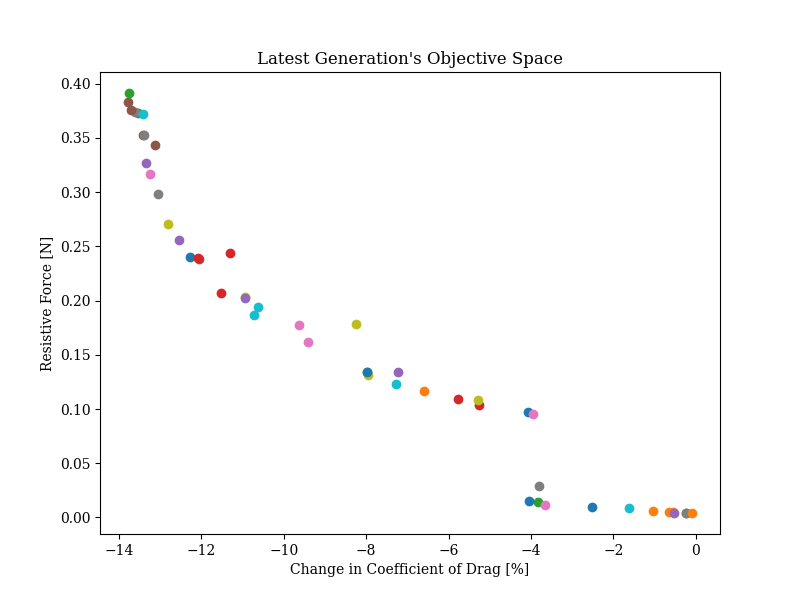

In [83]:
plot = Scatter(title='Latest Generation\'s Objective Space', 
               legend=False, 
               labels=opt_run.problem.BaseCase.obj_labels,
               s=60,
               alpha=0.9
              )
for ind_i, ind in enumerate(latest_popF):
    plot.add(ind, label=f'IND {ind_i+1}')
plot.do()
# plot.ax.set_xscale('log')
# save objective space plot
plot.save(os.path.join(opt_run.plotDir, 'latest_obj_space.png'), dpi=100)
plot.show()

### Optimum

In [84]:
assert opt_run.algorithm.opt is not None
print('Number of Optimum:', len(opt_run.algorithm.opt))

Number of Optimum: 41


In [85]:
# opt_run.problem.BaseCase.var_labels = ["Amplitude [radians/s]", "Frequency [cycles/s]", "Reynolds Number"]
print(opt_run.problem.BaseCase.var_labels)
print()
labels = ["Amplitude", "Frequency", "Reynolds Number"]
labels = ["Amplitude [radians/s]", "Frequency [cycles/s]", "Reynolds Number"]
n_dim = len(opt_run.problem.BaseCase.var_labels)
labels_proc = [f"${labels}_{{{i}}}$" for i in range(1, n_dim + 1)]
if isinstance(labels, list):
    print(labels)
    
print(labels_proc)

['Amplitude [radians/s]', 'Frequency [cycles/s]']

['Amplitude [radians/s]', 'Frequency [cycles/s]', 'Reynolds Number']
["$['Amplitude [radians/s]', 'Frequency [cycles/s]', 'Reynolds Number']_{1}$", "$['Amplitude [radians/s]', 'Frequency [cycles/s]', 'Reynolds Number']_{2}$"]


In [86]:
#opt_run.problem.BaseCase.var_labels = opt_run.problem.BaseCase.var_labels.tolist()

In [119]:
n_opt_disp = 100

In [120]:
# opt_pop = opt_run.algorithm.opt[:n_opt_disp]
# gen = opt_run.algorithm.n_gen
# if len(opt_pop) < 20:
#     leg = True
# else:
#     leg = False
# varPlot = Scatter(title=f'{opt_run.optName}: Optimum - Generation {gen} - Design Space', 
#                   figsize=(10,8),
#                   labels=opt_run.problem.BaseCase.var_labels[::2],
#                   legend=leg
#                  )
# #varPlot.axis_labels = opt_run.problem.BaseCase.var_labels
# for opt_i, opt in enumerate(opt_pop):
#     varPlot.add(opt.get('X')[::2], label=f'opt{opt_i}', s=70)
# varPlot.save(os.path.join(opt_run.plotDir, f'optimum-gen{gen}-varSpace-Re-Amp.png'), dpi=100)
# varPlot.show()

In [121]:
# opt_pop = opt_run.algorithm.opt[:n_opt_disp]
# gen = opt_run.algorithm.n_gen
# if len(opt_pop) < 20:
#     leg = True
# else:
#     leg = False
# varPlot = Scatter(title=f'{opt_run.optName}: Optimum - Generation {gen} - Design Space', 
#                   figsize=(10,8),
#                   labels=opt_run.problem.BaseCase.var_labels[:2],
#                   legend=leg
#                  )
# #varPlot.axis_labels = opt_run.problem.BaseCase.var_labels
# for opt_i, opt in enumerate(opt_pop):
#     varPlot.add(opt.get('X')[:2], label=f'opt{opt_i}', s=70)
# varPlot.save(os.path.join(opt_run.plotDir, f'optimum-gen{gen}-varSpace-freq-Amp.png'), dpi=100)
# varPlot.show()

In [122]:
# opt_pop = opt_run.algorithm.opt[:n_opt_disp]
# gen = opt_run.algorithm.n_gen
# if len(opt_pop) < 20:
#     leg = True
# else:
#     leg = False
# varPlot = Scatter(title=f'{opt_run.optName}: Optimum - Generation {gen} - Design Space', 
#                   figsize=(10,8),
#                   labels=opt_run.problem.BaseCase.var_labels[1:],
#                   legend=leg
#                  )
# #varPlot.axis_labels = opt_run.problem.BaseCase.var_labels
# for opt_i, opt in enumerate(opt_pop):
#     varPlot.add(opt.get('X')[1:], label=f'opt{opt_i}', s=70)
# varPlot.save(os.path.join(opt_run.plotDir, f'optimum-gen{gen}-varSpace-Re-freq.png'), dpi=100)
# varPlot.show()

<IPython.core.display.Javascript object>


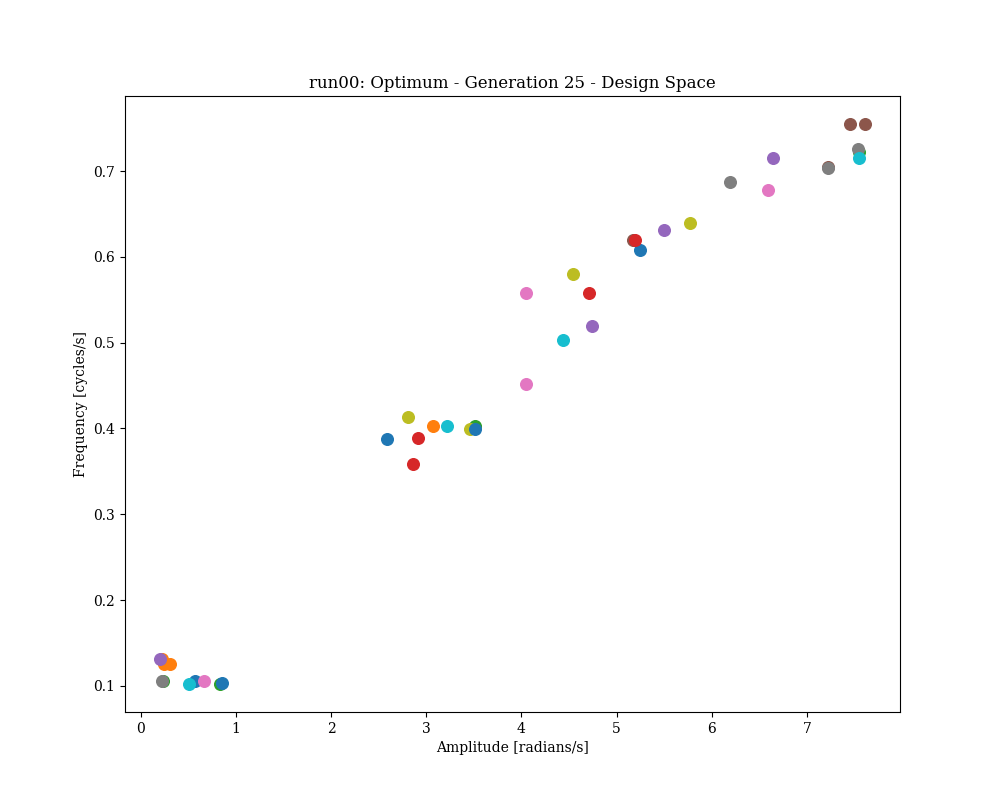

In [123]:
opt_pop = opt_run.algorithm.opt[:n_opt_disp]
gen = opt_run.algorithm.n_gen
if len(opt_pop) < 20:
    leg = True
else:
    leg = False
varPlot = Scatter(title=f'{opt_run.data_folder}: Optimum - Generation {gen} - Design Space', 
                  figsize=(10,8),
                  labels=opt_run.problem.BaseCase.var_labels,
                  legend=leg
                 )
varPlot.axis_labels = opt_run.problem.BaseCase.var_labels
for opt_i, opt in enumerate(opt_pop):
    varPlot.add(opt.get('X'), label=f'opt{opt_i}', s=70)
varPlot.save(os.path.join(opt_run.plotDir, f'optimum-gen{gen}-varSpace.png'), dpi=100)
varPlot.show()

<IPython.core.display.Javascript object>


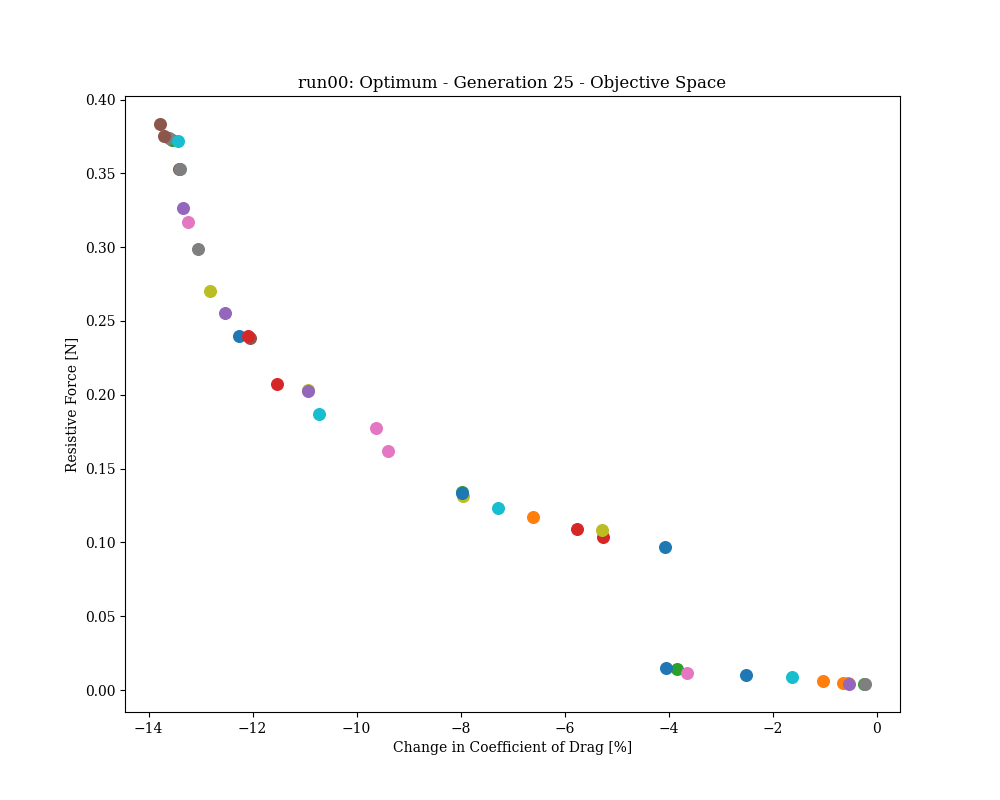

In [125]:
opt_pop = opt_run.algorithm.opt[:n_opt_disp]
gen = opt_run.algorithm.n_gen
if len(opt_pop) < 20:
    leg = True
else:
    leg = False
plot = Scatter(title=f'{opt_run.data_folder}: Optimum - Generation {gen} - Objective Space', 
                  figsize=(10,8),
                  labels=opt_run.problem.BaseCase.obj_labels,
                  legend=leg
                 )
for opt_i, opt in enumerate(opt_pop):
    plot.add(opt.get('F'), label=f'opt{opt_i}', s=70)
plot.do()
# plot.ax.set_xscale('log')
plot.save(os.path.join(opt_run.plotDir, f'optimum-gen{gen}-objSpace.png'), dpi=100)
plot.show()

### Print Every Generation

In [93]:
if opt_run.algorithm.n_gen < 10 and len(opt_run.algorithm.pop.get('X')) < 10:
    print('EVERY GENERATION')
    for gen in range(algorithm.n_gen):
        print(f'generation {gen}')
        var_g = algorithm.callback.data['var'][gen]
        obj_g = algorithm.callback.data['obj'][gen]
        for ind in range(len(var_g)):
            var_i = var_g[ind]
            obj_i = obj_g[ind]
            print(f'ind{ind}: ', end='')
            for n in range(len(var_i)):
                print(f'{var_labels[n]}: {var_i[n]}', end=' ')
            print(' // ', end='')
            for n in range(len(obj_i)):
                print(obj_labels[n] + ':' + '%.3f' % obj_i[n], end=' ')
            print()

### All Design Points

<IPython.core.display.Javascript object>


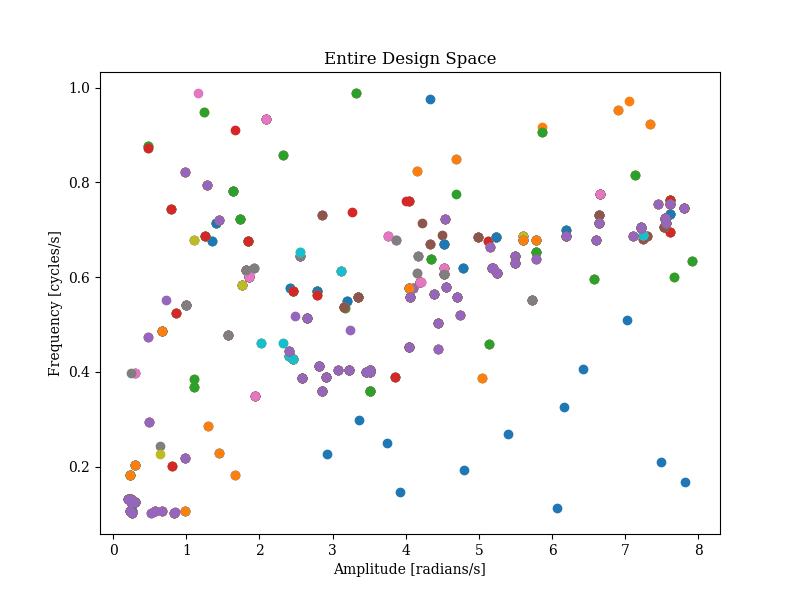

In [94]:
if opt_run.problem.BaseCase.n_var > 3: # plot without labels
    print('CAN NOT REPRESENT DESIGN SPACE IN 3D. USING ')
    plot = Scatter()
    plot.add(algorithm.pop.get('X')[:10])

# All design points
else: 
    if opt_run.algorithm.n_gen < 15:
        leg = True
    else:
        leg = False
    plot = Scatter(title='Entire Design Space', legend=leg, labels=opt_run.problem.BaseCase.var_labels)
    for g, alg in enumerate(hist):
        plot.add(alg.pop.get('X'), label=f'GEN {g+1}')

# save plot to png file
plot.save(os.path.join(opt_run.plotDir, 'entire_design_space.png'), dpi=100)
plot.show()

### All Objective Points

<IPython.core.display.Javascript object>


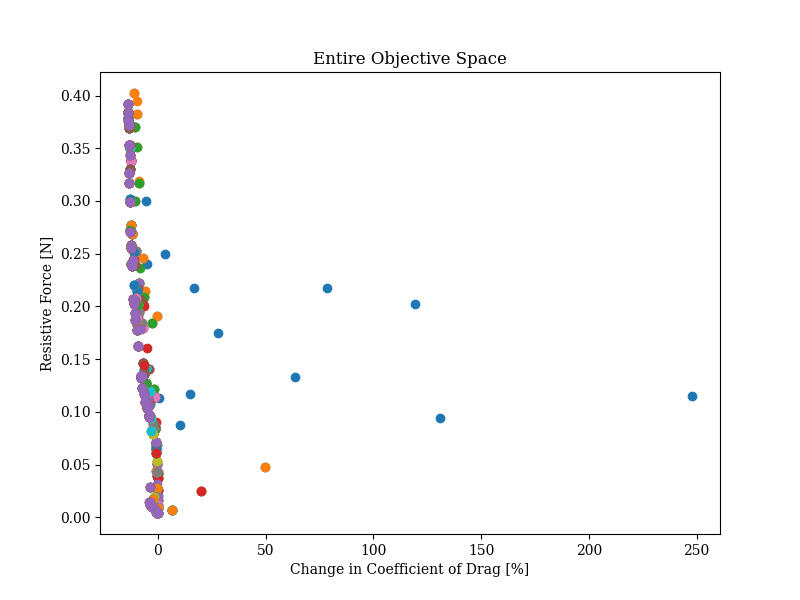

In [111]:
if opt_run.algorithm.n_gen < 15:
    leg = True
else:
    leg = False
plot = Scatter(title='Entire Objective Space', legend=leg, labels=opt_run.problem.BaseCase.obj_labels)
for g, alg in enumerate(hist):  # range(algorithm.n_gen)
#     if g == 0:
#         continue
    plot.add(alg.pop.get('F'), label=f'GEN {g+1}')
# if pf is not None:
#     plot.add(pf, plot_type="line", color="black", alpha=0.7)
plot.save(os.path.join(opt_run.plotDir, 'entire_obj_space.png'), dpi=100)
plot.show()

In [110]:
# gens = range(1, len(opt_run.algorithm.history)+1)
# var_plot, obj_plot = opt_run.plotGens(gens)
# obj_plot.ax.set_xscale('log')
# obj_plot.show()

In [98]:
# def plotOptSpaces(self, algs, fileName, folder=None , maxLegLen=15):
#     if folder is None:
#         folder = self.plotDir
#     if len(algs) < maxLegLen:
#         leg = True
#     else:
#         leg = False
#     obj_plot = Scatter(title='Objective Space', legend=leg, labels=self.BaseCase.obj_labels)
#     var_plot = Scatter(title='Design Space', legend=leg, labels=self.BaseCase.var_labels)
#     for g, alg in enumerate(algs):  # range(algorithm.n_gen)
#         obj_plot.add(alg.pop.get('F'), label=f'GEN {g+1}')
#         var_plot.add(alg.pop.get('X'), label=f'GEN {g+1}')
#     obj_plot.save(os.path.join(folder, fileName+'-obj_space.png'), dpi=100)
#     var_plot.save(os.path.join(folder, fileName+'-var_space.png'), dpi=100)
#     #plot.show()

### Last 10 Generation of Parameter Space

<IPython.core.display.Javascript object>


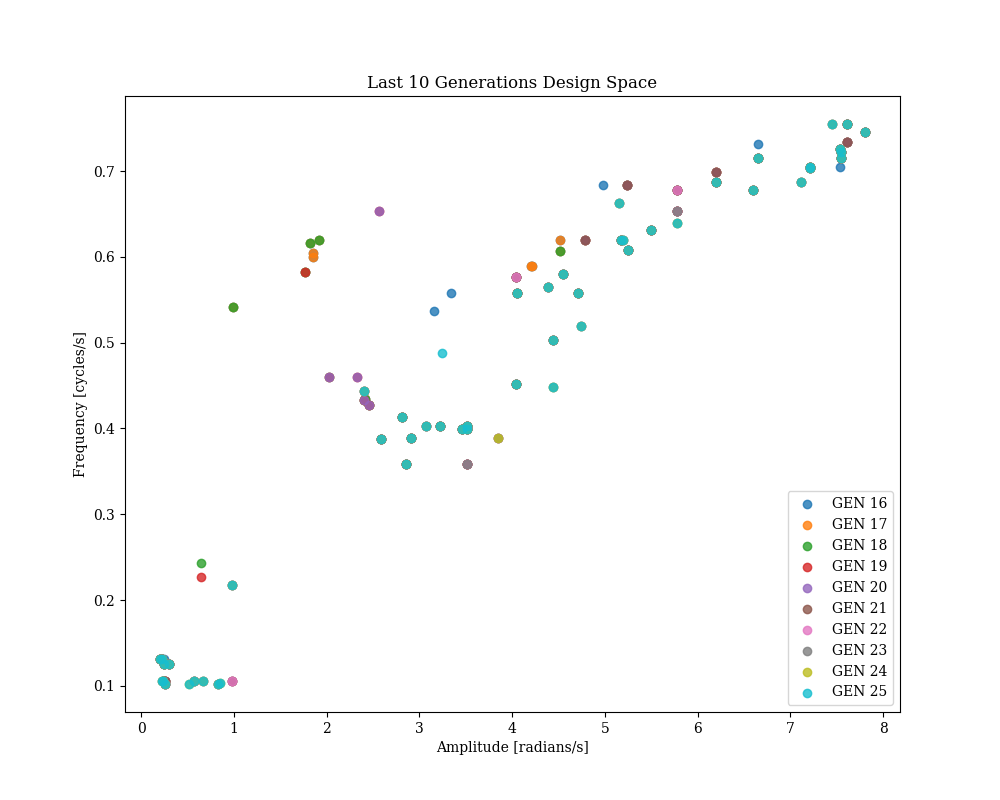

In [109]:
# Last 10 generations
# last 10 gens. design points
hist = opt_run.algorithm.history
if opt_run.algorithm.n_gen > 10:
    #### Design Space ####
    if opt_run.problem.BaseCase.n_var > 3: # plot without labels
        print('CAN NOT REPRESENT OBJECTIVE SPACE IN 3D. Using Pairwise Scatter Plots')
        plot = Scatter(figsize=(10, 8))
        plot.add(algorithm.pop.get('X')[:10])
    # Last 10 generations of objective points
    else: 
        plot = Scatter(title='Last 10 Generations Design Space', legend=True, 
                       figsize=(10, 8),
                       labels=opt_run.problem.BaseCase.var_labels
                      )
        gen = len(hist)
        for g in range(gen-10, gen):
            plot.add(hist[g].pop.get('X'), label=f'GEN {g+1}',
                     alpha=0.8
                    )
    # save design space plot
    plot.save(os.path.join(opt_run.plotDir, 'final_10_design_space.png'), dpi=100)
    plot.show()

### Last 10 Generation of Objective Space

<IPython.core.display.Javascript object>


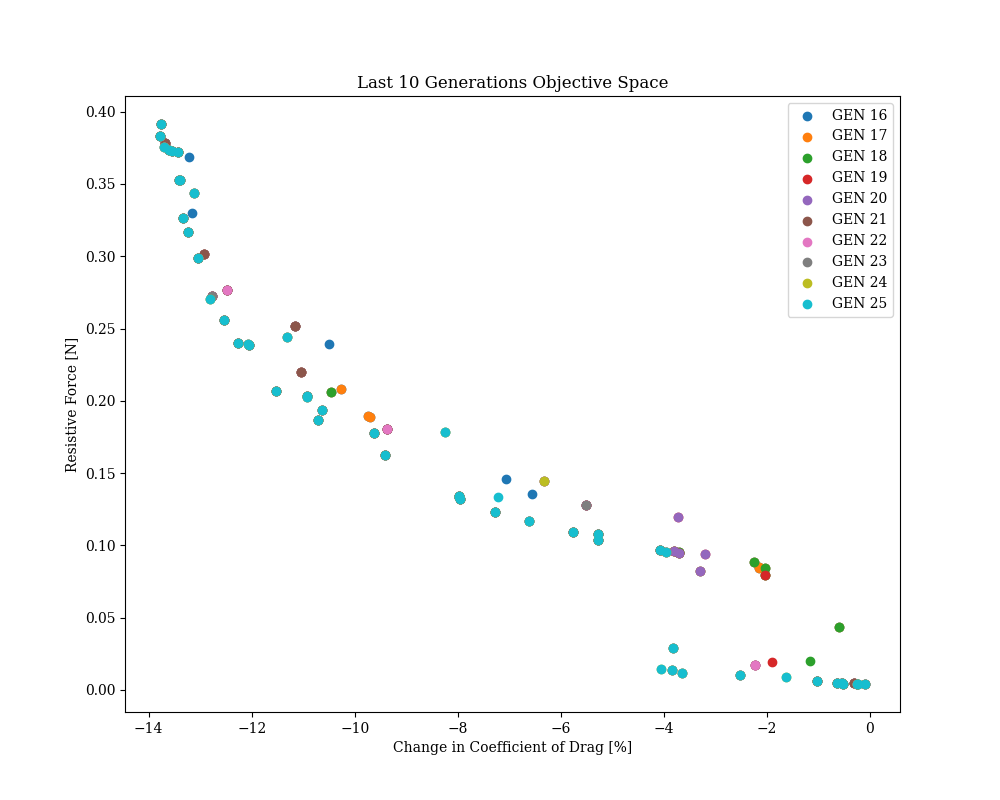

In [101]:
### Objective Space ####
if opt_run.algorithm.n_gen > 10:
    if opt_run.problem.BaseCase.n_obj >3:
        plot = Scatter()
        plot.add(opt_run.algorithm.pop.get('F')[:10])
    else:
        # last 10 gens. objective points
        plot = Scatter(title='Last 10 Generations Objective Space', 
                       legend=True, 
                       labels=opt_run.problem.BaseCase.obj_labels,
                       figsize=(10,8)
                      )
        gen = len(hist)
        for g in range(gen-10, gen):
            plot.add(hist[g].pop.get('F'), label=f'GEN {g+1}')

    # save objective space plot
    plot.save(os.path.join(opt_run.plotDir, 'final_10_obj_space.png'), dpi=100)
    plot.show()

### Extract Data 

In [104]:
checkpoint = opt_run.algorithm

In [105]:
# is the full history of the algorithm saved? 
print('Checkpoint Objective Population:\n', checkpoint.pop.get('F')[:5])
if np.all(checkpoint.pop.get('F')) is not None: 
    algorithm = checkpoint
    print('Checkpoint @ end of generation')
    print(f'     Generation - {algorithm.n_gen}, {algorithm.callback.gen}')
else:
    print('Checkpoint mid-generation')
    print('     "algorithm" variable represents last completed generation')
    print('     "algorithm.callback" unusable with history objects')
    algorithm = checkpoint.history[-1]
    print(f'     Generation - {algorithm.n_gen}, {algorithm.callback.gen}')

Checkpoint Objective Population:
 [[-1.22649205e+01  2.39918854e-01]
 [-1.02699356e+00  6.22784147e-03]
 [-7.98250260e+00  1.34074871e-01]
 [-5.26935367e+00  1.03924016e-01]
 [-1.33422226e+01  3.26621190e-01]]
Checkpoint @ end of generation
     Generation - 25, 26


# Preperation for Continuation

In [106]:
pprint(opt_run.algorithm.termination.__dict__)
opt_run.algorithm.termination

{'force_termination': False, 'n_max_gen': 25}


In [107]:
from pymoo.factory import get_termination
term = get_termination('n_gen', 30)
print(term)

In [108]:
# opt_run.algorithm.termination = term
#opt_run.saveCP()